In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from numpy import diff
from scipy.integrate import solve_ivp

In [2]:
a = 1
e = 0.5
G = 1
m = 1
M = 2
psi_0 = 0
time_0 = 0
psi_dot_0 = 0
omega = np.sqrt((G * M)/a**3)
time_step = np.linspace(0, ((2*np.pi)/omega), 100)
psi_array = []
psi_dot_array = []
position = []
velocity = []

def r(psi_0):
    return a * (1 - e * np.cos(psi_0))

def kepler(t, psi):
    return omega * t + e * np.sin(psi_0)

def kepler_dot(psi, psi_dot):
    return omega + e * np.cos(psi_0) * (psi_dot_0)

def r_dot(psi_0, psi_dot_0):
    return a * e * np.sin(psi_0) * (psi_dot_0)

In [3]:
print(kepler(time_0, psi_0))
print(kepler_dot(psi_0, psi_dot_0))

0.0
1.4142135623730951


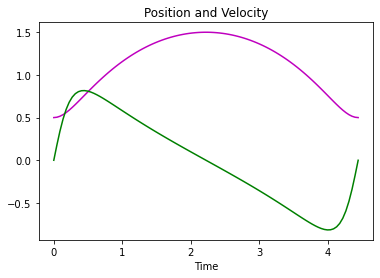

In [4]:
for i in range(0,len(time_step)):
    
    t = time_step[i]
    while abs(kepler(t, psi_0) - psi_0) >= 1e-4:
        psi_0 = omega * t + e * np.sin(psi_0)
    position_0 = r(psi_0)
    position = np.append(position, position_0)
    
    while abs(kepler_dot(psi_0, psi_dot_0) - psi_dot_0) >= 1e-4:
        psi_dot_0 = omega + e * np.cos(psi_0) * (psi_dot_0)
    velocity_0 = r_dot(psi_0, psi_dot_0)
    velocity = np.append(velocity, velocity_0)
    

plt.plot(time_step, position, 'm')
plt.plot(time_step, velocity, 'g')
plt.xlabel('Time')
plt.title('Position and Velocity')
plt.show()

N-Body Code: 

In [74]:
#generate initial conditions
x_0 = np.array([-1.0, 1.0])
y_0 = np.array([0.0, 0.0])
z_0 = np.array([0.0, 0.0])
vx_0 = np.array([0.0, 0.0])
vy_0 = np.array([-0.5, 0.5])
vz_0 = np.array([0.0, 0.0])
time = np.linspace(1,2*np.pi,1000)

In [133]:
#gravity function in all 3 directions, acceleration due to gravity, need to send position of all particles, also need
#the masses
def gravity_x(x_0, time): #function to calculate direction in x
    #dvx1dt = (-G * m * (x_0[0]-x_0[1]) / ((x_0[1]-x_0[0])**2 + (y_0[1]-y_0[0])**2)**(3/2))#(np.linalg.norm(x_0[0]-x_0[1]))**3)
    dvx2dt = (G * m * (x_0[1]-x_0[0]) / ((x_0[1]-x_0[0])**2 + (y_0[1]-y_0[0])**2)**(3/2))#(np.linalg.norm(x_0[0]-x_0[1]))**3)
    return ([dvx2dt])
    
def gravity_y(y_0, time):
    #dvy1dt = (-G * m * (y_0[0]-y_0[1]) / ((x_0[1]-x_0[0])**2 + (y_0[1]-y_0[0])**2)**(3/2))
    dvy2dt = (G * m * (y_0[1]-y_0[0]) / ((x_0[1]-x_0[0])**2 + (y_0[1]-y_0[0])**2)**(3/2))
    return ([dvy2dt])
    
def gravity_z(z_0, time): 
    dvz1dt = (-G * m * (z_0[0]-z_0[1]) / (np.linalg.norm(z_0[0]-z_0[1]))**3)
    dvz2dt = (-G * m * (z_0[1]-z_0[0]) / (np.linalg.norm(z_0[0]-z_0[1]))**3)
    return ([dvz1dt, dzy2dt])

def sum_x(j, time):
    x_acceleration = []
    for j in range(2):
        temp1 = gravity_x(x_0, time)
        x_acceleration.append(temp1)
    return np.sum(x_acceleration)

def sum_y(i, time):
    y_acceleration = []
    for i in range(2):
        temp2 = gravity_y(y_0, time)
        y_acceleration.append(temp2)
    return np.sum(y_acceleration)


def F(time, initial_vector):
    xvel = initial_vector[4:6]
    yvel = initial_vector[6:8]
    
    xaccel = [sum_x(i, time) for i in x_0]
    yaccel = [sum_y(i, time) for i in y_0]
        
    matrix = np.array([xvel, yvel, xaccel, yaccel], float)
    
    return matrix.ravel()

#acceleration append, for loop(i in range 2), call gravity_x, grab vx_0 and time, append to list 
#2 lists for x and y direction (accel) 
#accel =m[]
#for i in range(2):
    #temp 1 = gravity_x(vx_0[i], time)
    #same for y
    #xaccel.append

In [134]:
pos_1 = initial_vector[0:8:2]
pos_2 = initial_vector[1:8:2]
test = np.array([pos_1, pos_2])
print(test)

[[-1.   0.   0.  -0.5]
 [ 1.   0.   0.   0.5]]


In [135]:
initial_vector = np.concatenate((x_0, y_0, vx_0, vy_0))
print(initial_vector)
print(type(initial_vector))

[-1.   1.   0.   0.   0.   0.  -0.5  0.5]
<class 'numpy.ndarray'>


In [136]:
#ODE solver to get velocity then position
velocity_ODE = solve_ivp(F, [0,2*np.pi], y0=initial_vector, method='LSODA', rtol=1e-13)
print(velocity_ODE)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 14
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.98691765e-06, 3.97383531e-06, 1.98731504e-02,
       3.97423269e-02, 5.96115034e-02, 2.58303269e-01, 4.56995034e-01,
       6.55686799e-01, 2.64260445e+00, 4.62952211e+00, 6.28318531e+00])
 t_events: None
        y: array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -9.99901264e-01, -9.99605137e-01, -9.99111617e-01,
        -9.83319855e-01, -9.47788885e-01, -8.92518705e-01,
         7.45839573e-01,  4.35811873e+00,  8.86960440e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00009874e+00,  1.00039486e+00,  1.00088838e+00,
         1.01668014e+00,  1.05221112e+00,  1.10748129e+00,
         2.74583957e+00,  6.35811873e+00,  1.08696044e+01],
       [ 0.00000000e+00, -9.93458827e-07, -1.98691765e-06,
        -9.93657518e-03, -1.98711634e-02, -2.980

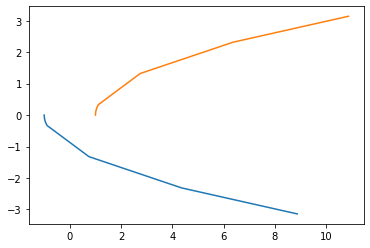

In [137]:
plt.plot(velocity_ODE.y[0], velocity_ODE.y[2])

plt.plot(velocity_ODE.y[1], velocity_ODE.y[3])

plt.show()
